feature selection
----
source: https://github.com/FIIT-IAU/IAU-course/blob/main/exercises/week-06/IAU_062_feature_selection.ipynb

In [1]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, SelectFromModel
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import pandas as pd
import json

In [2]:
# depth of this filr in the project
file_depth = '../../..'

with open(file_depth + '/config/data_1m_config.json') as config_file:
    config = json.load(config_file)

context_data_path = config['context_data']
context_data = pd.read_csv(file_depth + context_data_path)
context_data

,user_id,movie_id,day,is_weekday,season,part_of_day,holiday,user_gender,user_age,user_occupation,...,genre_film-noir,genre_forchildren,genre_horror,genre_musical,genre_mystery,genre_romance,genre_sci-fi,genre_thriller,genre_war,genre_western
0,1,1193,7,0,4,4,new_years,F,1,10,...,0,0,0,0,0,0,0,0,0,0
1,1,661,7,0,4,4,new_years,F,1,10,...,0,1,0,1,0,0,0,0,0,0
2,1,914,7,0,4,4,new_years,F,1,10,...,0,0,0,1,0,1,0,0,0,0
3,1,3408,7,0,4,4,new_years,F,1,10,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,7,0,4,4,no_holiday,F,1,10,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,3,1,1,4,no_holiday,M,25,6,...,0,0,0,0,0,0,0,0,0,0
1000205,6040,1094,3,1,1,4,no_holiday,M,25,6,...,0,0,0,0,0,1,0,0,1,0
1000206,6040,562,3,1,1,4,no_holiday,M,25,6,...,0,0,0,0,0,0,0,0,0,0
1000207,6040,1096,3,1,1,4,no_holiday,M,25,6,...,0,0,0,0,0,0,0,0,0,0


Categorical data to numerical

In [3]:
# Label encode categorical columns
categorical_columns = ['holiday', 'user_gender']

for column in categorical_columns:
    context_data[column] = LabelEncoder().fit_transform(context_data[column])

context_data

,user_id,movie_id,day,is_weekday,season,part_of_day,holiday,user_gender,user_age,user_occupation,...,genre_film-noir,genre_forchildren,genre_horror,genre_musical,genre_mystery,genre_romance,genre_sci-fi,genre_thriller,genre_war,genre_western
0,1,1193,7,0,4,4,1,0,1,10,...,0,0,0,0,0,0,0,0,0,0
1,1,661,7,0,4,4,1,0,1,10,...,0,1,0,1,0,0,0,0,0,0
2,1,914,7,0,4,4,1,0,1,10,...,0,0,0,1,0,1,0,0,0,0
3,1,3408,7,0,4,4,1,0,1,10,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,7,0,4,4,2,0,1,10,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,3,1,1,4,2,1,25,6,...,0,0,0,0,0,0,0,0,0,0
1000205,6040,1094,3,1,1,4,2,1,25,6,...,0,0,0,0,0,1,0,0,1,0
1000206,6040,562,3,1,1,4,2,1,25,6,...,0,0,0,0,0,0,0,0,0,0
1000207,6040,1096,3,1,1,4,2,1,25,6,...,0,0,0,0,0,0,0,0,0,0


In [4]:
target_data_path = config['target_data']
target_ratings = pd.read_csv(file_depth + target_data_path)
target_ratings

,rating_id,rating
0,0,5
1,1,3
2,2,3
3,3,4
4,4,5
...,...,...
1000204,1000204,1
1000205,1000205,5
1000206,1000206,5
1000207,1000207,4


-----------
Data scaling

In [5]:
X = StandardScaler().fit_transform(context_data) 
y = target_ratings['rating']

#### Feature selection using Mutual Information (MI)

* Mutual information between two random variables is a non-negative value, which measures the dependency between the variables.
* It is equal to zero if and only if two random variables are independent
* Higher values mean higher dependency.

movie_id             0.139486
user_id              0.120984
user_zip_code        0.083730
movie_year           0.017307
genre_drama          0.007709
genre_horror         0.004858
genre_film-noir      0.003806
genre_war            0.003580
user_occupation      0.003360
user_age             0.002351
day                  0.001471
genre_crime          0.001246
genre_sci-fi         0.001178
user_gender          0.001147
genre_romance        0.001121
genre_action         0.001101
genre_comedy         0.001014
holiday              0.000925
genre_animation      0.000385
season               0.000304
genre_thriller       0.000000
genre_adventure      0.000000
genre_documentary    0.000000
genre_fantasy        0.000000
genre_forchildren    0.000000
genre_musical        0.000000
part_of_day          0.000000
is_weekday           0.000000
genre_mystery        0.000000
genre_western        0.000000
dtype: float64


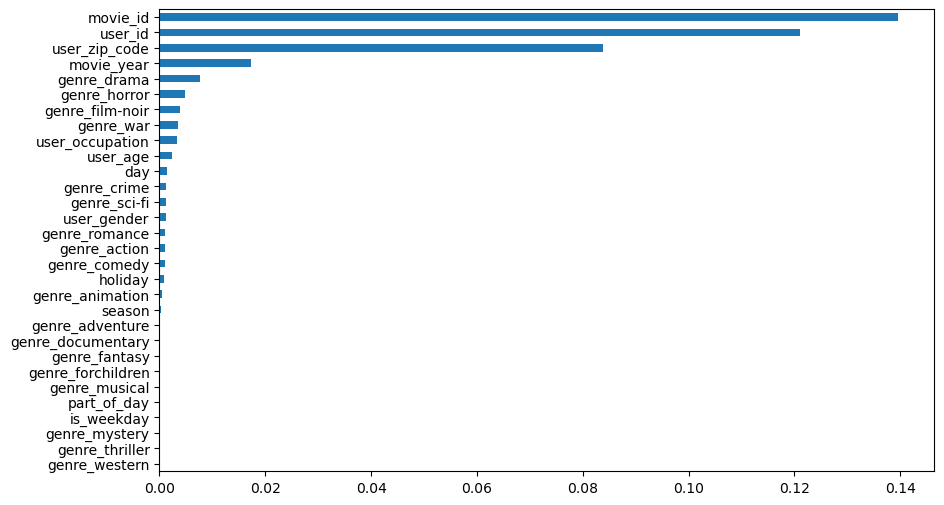

In [6]:
mi_selector = SelectKBest(score_func=mutual_info_regression, k=len(context_data.columns))
mi_selector.fit_transform(X, y)

mi_scores = pd.Series(abs(mi_selector.scores_), index=context_data.columns).sort_values()
plt.figure(figsize=(10,6))
mi_scores.plot(kind='barh')
print(mi_scores.sort_values(ascending=False))

#### Feature selection using SelectFromModel

##### Model : Logistic Regression

In [7]:
lm_selector = SelectFromModel(estimator=LogisticRegression(max_iter=1000)).fit(X, y)
# print(lm_selector.estimator_.coef_)
# print(lm_selector.threshold_)
print(lm_selector.get_support())
lm_selector_list = lm_selector.get_support()

X_new_log_reg = lm_selector.transform(X)
print(X_new_log_reg.shape)
# X_new_lm

[False  True False False False False False False  True False False  True
 False False  True False False  True  True False  True  True  True False
 False False False  True  True False]
(1000209, 11)


##### Model : L1

In [8]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
l1_selector = SelectFromModel(estimator=lsvc, prefit=True)
print(l1_selector.get_support())
l1_selector_list = l1_selector.get_support()

X_new_l1 = l1_selector.transform(X)
print(X_new_l1.shape)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
(1000209, 30)


---------------

In [9]:
mi_selected_keys = mi_scores[mi_scores != 0].index.tolist()

lm_selected_keys = []
for key, selected in zip(context_data.keys(), lm_selector_list):
    if selected:
        lm_selected_keys.append(key)

l1_selected_keys = []
for key, selected in zip(context_data.keys(), l1_selector_list):
    if selected:
        l1_selected_keys.append(key)

print('Number of features selected using Mutual Information: ', len(mi_selected_keys))
print(mi_selected_keys)

print()

print('Number of features selected using Logistic Regression: ', len(lm_selected_keys))
print(lm_selected_keys)

print()

print('Number of features selected using L1: ', len(l1_selected_keys))
print(l1_selected_keys)

Number of features selected using Mutual Information:  20
['season', 'genre_animation', 'holiday', 'genre_comedy', 'genre_action', 'genre_romance', 'user_gender', 'genre_sci-fi', 'genre_crime', 'day', 'user_age', 'user_occupation', 'genre_war', 'genre_film-noir', 'genre_horror', 'genre_drama', 'movie_year', 'user_zip_code', 'user_id', 'movie_id']

Number of features selected using Logistic Regression:  11
['movie_id', 'user_age', 'movie_year', 'genre_animation', 'genre_documentary', 'genre_drama', 'genre_film-noir', 'genre_forchildren', 'genre_horror', 'genre_thriller', 'genre_war']

Number of features selected using L1:  30
['user_id', 'movie_id', 'day', 'is_weekday', 'season', 'part_of_day', 'holiday', 'user_gender', 'user_age', 'user_occupation', 'user_zip_code', 'movie_year', 'genre_action', 'genre_adventure', 'genre_animation', 'genre_comedy', 'genre_crime', 'genre_documentary', 'genre_drama', 'genre_fantasy', 'genre_film-noir', 'genre_forchildren', 'genre_horror', 'genre_musical'

Saving the selected features to files

In [10]:
with open('feature_selections_results/lm_selected_features.txt', 'w') as file:
    for item in lm_selected_keys:
        file.write(str(item) + '\n')

with open('feature_selections_results/l1_selected_features.txt', 'w') as file:
    for item in l1_selected_keys:
        file.write(str(item) + '\n')

with open('feature_selections_results/mi_selected_features.txt', 'w') as file:
    for item in mi_selected_keys:
        file.write(str(item) + '\n')